In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
from scipy.stats import pearsonr
from collections import Counter
from wordcloud import STOPWORDS
import re

data = pd.read_csv('Dataset.csv')
print(data.head)

<bound method NDFrame.head of       Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul  

Task 1: Restaurant Reviews


Analyze the text reviews to identify the most common positive and negative keywords.

In [6]:
# Check for 'Reviews' column
if 'Reviews' in data.columns:
    reviews = data['Reviews'].dropna().tolist()
    words = [word for review in reviews for word in re.findall(r'\w+', review.lower()) if word not in STOPWORDS]
    counts = Counter(words)

    positive = {'good', 'great', 'excellent', 'amazing', 'delicious', 'awesome', 'perfect'}
    negative = {'bad', 'terrible', 'awful', 'poor', 'disgusting', 'worst', 'horrible'}

    print("Positive:", {k: v for k, v in counts.items() if k in positive})
    print("Negative:", {k: v for k, v in counts.items() if k in negative})
else:
    print("No 'Reviews' column found.")


No 'Reviews' column found.


Calculate the average length of reviews and explore if there is a relationship between review length and rating.


In [9]:
# Check if 'Reviews' and 'Rating' columns exist
if 'Reviews' in data.columns and 'Aggregate rating' in data.columns:
    # Calculate the length of each review
    data['Review Length'] = data['Reviews'].dropna().apply(len)
    
    # Calculate the average review length
    avg_length = data['Review Length'].mean()
    print(f"Average Review Length: {avg_length}")
    
    # Explore relationship between review length and rating
    correlation = data[['Review Length', 'Aggregate rating']].corr().iloc[0, 1]
    print(f"Correlation between Review Length and Rating: {correlation}")
    
else:
    print("The dataset must contain 'Reviews' and 'Aggregate rating' columns.")


The dataset must contain 'Reviews' and 'Aggregate rating' columns.


Task 2: Votes Analysis


Identify the restaurants with the highest and lowest number of votes.


In [2]:
print('Restaurant with the highest number of votes :--' , 
data.loc[data['Votes'] == data['Votes'].max() , 'Restaurant Name'].tolist()[-1])

print('Restaurant with the lowest number of votes :--' , 
data.loc[data['Votes'] == data['Votes'].min() , 'Restaurant Name'].tolist()[-1])

Restaurant with the highest number of votes :-- Toit
Restaurant with the lowest number of votes :-- Platters


Analyze if there is a correlation between the number of votes and the rating of a restaurant.


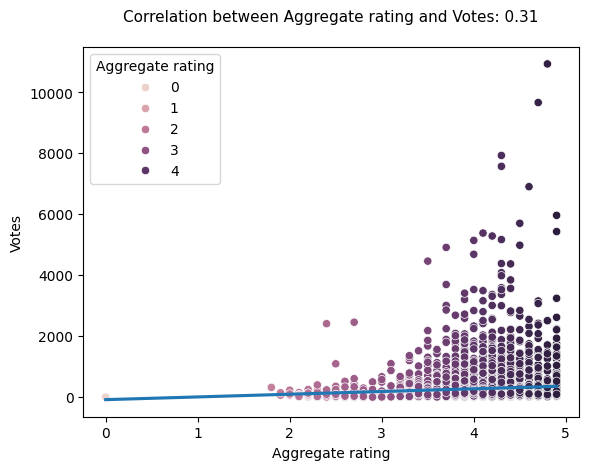

In [3]:
correlation, _ = pearsonr(data['Aggregate rating'], data['Votes']) 
correlation = round(correlation , 2 )

sns.scatterplot(data= data , y = 'Votes' , hue = 'Aggregate rating' , x = 'Aggregate rating' )
sns.regplot(data=data, x='Aggregate rating', y='Votes', scatter=False)
plt.title(f"Correlation between Aggregate rating and Votes: {correlation}\n" , fontdict=dict(size = 11))
plt.show()

Task 3: Price Range vs. Online Delivery and Table Booking


Analyze if there is a relationship between the price range and the availability of online delivery and table booking.


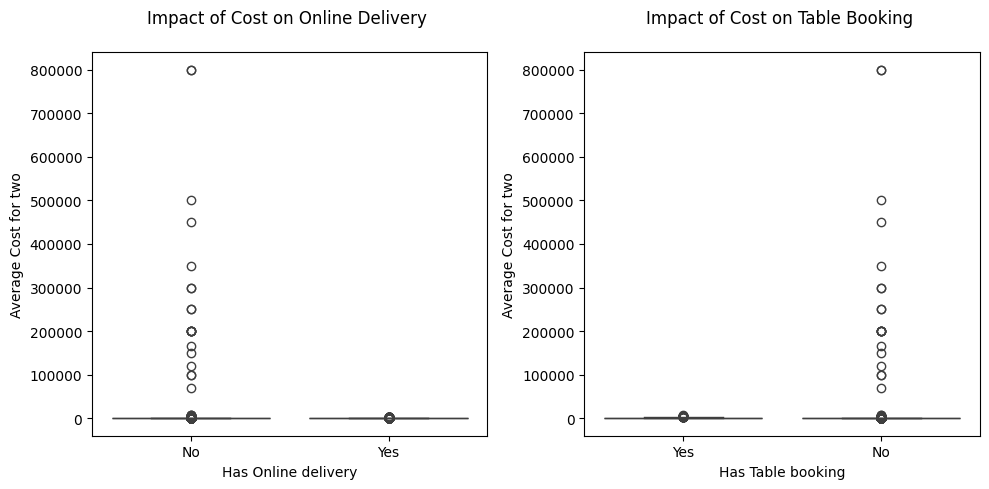

In [5]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(x='Has Online delivery', y='Average Cost for two', data=data)
plt.xlabel('Has Online delivery')
plt.ylabel('Average Cost for two')
plt.title('Impact of Cost on Online Delivery \n')

plt.subplot(1,2,2)

sns.boxplot(x='Has Table booking', y='Average Cost for two', data=data )
plt.xlabel('Has Table booking')
plt.ylabel('Average Cost for two')
plt.title('Impact of Cost on Table Booking \n')

plt.tight_layout()
plt.show()

Online Delivery and Table Booking both option show a negative relationship with Cost.

High priced Restaurants which have average cost more than 10000 did not provide Online delivery as well as Table Booking option.

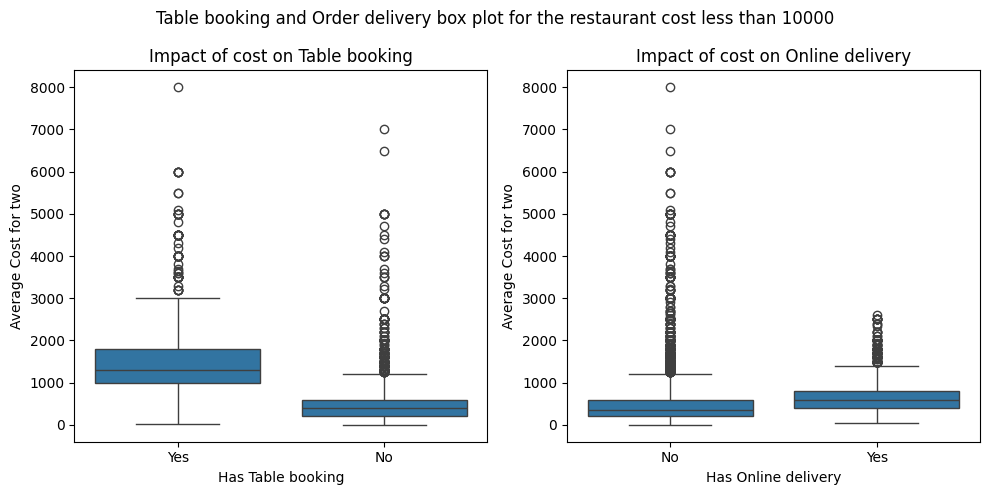

In [6]:
plt.figure(figsize= (10,5))
plt.suptitle('Table booking and Order delivery box plot for the restaurant cost less than 10000')
plt.subplot(1,2,1)
sns.boxplot(x='Has Table booking', y='Average Cost for two', data=data.loc[data['Average Cost for two']<10000 , :] )
plt.title('Impact of cost on Table booking')
plt.subplot(1,2,2)
sns.boxplot(x='Has Online delivery', y='Average Cost for two', data=data.loc[data['Average Cost for two']<10000 , :] )
plt.title('Impact of cost on Online delivery')
plt.tight_layout()
plt.show()

Most restaurants provide the option to reserve a table, and the average price ranges from 1,000 to 2,000.

The majority of restaurants provide the option of online delivery, with prices typically under $1,000.